# Data Analysis
![](https://www.revinate.com/wp-content/uploads/iStock-504903111-1140x411.jpg)

In this section, I will process one dataset and task with related problems to solve using the tools that leared in August 2020 including:

- Pandas
- Matplotlib & Seaborn

My analysis contain:
- Python code for data cleaning, manipulation and exploration. Keep the output of the code in your notebook.
- Markdown (Text Cell) for explaination and analysis.

###  The dataset contain the information such as the number of **comfirmed**, **deaths**, and **recovery cases** from 2019 Novel Corona Virus.
![](https://www.aljazeera.com/mritems/Images/2020/3/4/b9d6e9c0f8774beda9ce21bb0eacbfe2_7.jpg)

#### Import and clean Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# Import Data
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [ ]:
# check if any row is duplicated:
print(confirmed.duplicated().sum())
print(deaths.duplicated().sum())
print(recoveries.duplicated().sum())

0
0
0


In [ ]:
# check if any cell is null:
print(confirmed.isna().sum())
print(deaths.isna().sum())
print(recoveries.isna().sum())

Province/State    192
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
9/24/21             0
9/25/21             0
9/26/21             0
9/27/21             0
9/28/21             0
Length: 620, dtype: int64
Province/State    192
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
9/24/21             0
9/25/21             0
9/26/21             0
9/27/21             0
9/28/21             0
Length: 620, dtype: int64
Province/State    193
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
9/24/21             0
9/25/21             0
9/26/21             0
9/27/21             0
9/28/21             0
Length: 620, dtype: int64


In [ ]:
# Drop Province/State columns cause it contain 192 values and we dont need it, cause we has lat and long
confirmed.drop(columns = ['Province/State'], inplace = True)
deaths.drop(columns = ['Province/State'], inplace = True)
recoveries.drop(columns = ['Province/State'], inplace = True)

In [ ]:
# Indetifier: Columns that stay in long form
# Values: columns to convert to long form
confirmed = confirmed.melt(id_vars=confirmed.columns[:3],
                          value_vars=confirmed.columns[3:],
                          var_name='Date',
                          value_name='Case_number')
deaths = deaths.melt(id_vars=deaths.columns[:3],
                    value_vars=deaths.columns[3:],
                    var_name='Date',
                    value_name='Case_number')
recoveries = recoveries.melt(id_vars=recoveries.columns[:3],
                    value_vars=recoveries.columns[3:],
                    var_name='Date',
                    value_name='Case_number')

In [ ]:
# convert Date columns to date_time type
confirmed['Date'] = pd.to_datetime(confirmed['Date'])
deaths['Date'] = pd.to_datetime(deaths['Date'])
recoveries['Date'] = pd.to_datetime(recoveries['Date'])

In [ ]:
print(confirmed['Date'].max())
print(confirmed['Date'].min())

2021-09-28 00:00:00
2020-01-22 00:00:00


In [ ]:
# Delete all row with date before Feb 2020
confirmed= confirmed[~(confirmed['Date'] < '2020-02-01')]
deaths= deaths[~(deaths['Date'] < '2020-02-01')]
recoveries= recoveries[~(recoveries['Date'] < '2020-02-01')]

#### Overview: Reports the __latest__ situation of the Corona Virus in a __given country__: the __country where the report is from__ and other information:
- Total confirmed cases
- Total death
- Total recovered

In [ ]:
# Total confirmed cases group by country
Latest_confirmed = confirmed.groupby('Country/Region')['Case_number'].sum().reset_index()
Latest_confirmed.rename(columns = {'Case_number': 'confirmed'}, inplace=True)

In [ ]:
fig = px.scatter_geo(Latest_confirmed, locations="Country/Region", 
                     hover_name="Country/Region", size="confirmed", locationmode= 'country names')
fig.show()

In [ ]:
# Total death group by country
Latest_death = deaths.groupby('Country/Region')['Case_number'].sum().reset_index()
Latest_death.rename(columns = {'Case_number': 'death'}, inplace =True)

In [ ]:
fig = px.scatter_geo(Latest_death , locations="Country/Region", 
                     hover_name="Country/Region", size="death", locationmode= 'country names')
fig.show()

In [ ]:
# Total recovered group by country
Latest_recovered = recoveries.groupby('Country/Region')['Case_number'].sum().reset_index()
Latest_recovered.rename(columns = {'Case_number': 'recovered'}, inplace =True)

In [ ]:
fig = px.scatter_geo(Latest_recovered , locations="Country/Region", 
                     hover_name="Country/Region", size="recovered", locationmode= 'country names')
fig.show()

In [ ]:
# Merge 2 table: Latest_confirmed & Latest_death
Latest_confirmed_death = pd.merge(Latest_confirmed, Latest_death, how ="inner", on = 'Country/Region')

In [ ]:
# Merge 3 table: Latest_confirmed & Latest_death & Latest_recovered
Latest_situation = pd.merge(Latest_confirmed_death, Latest_recovered, how ="inner", on = 'Country/Region')

In [ ]:
Latest_situation 

,Country/Region,confirmed,death,recovered
0,Afghanistan,33292181,1390395,18289880
1,Albania,36829185,678989,22652652
2,Algeria,48105676,1377035,25670233
3,Andorra,4149898,47742,3085649
4,Angola,10038381,245415,5895800
...,...,...,...,...
190,Vietnam,29717166,656450,1261448
191,West Bank and Gaza,82107635,885304,57608773
192,Yemen,1863850,411596,772497
193,Zambia,34998496,558210,21852796


#### Visualize the confirmed, death and recovered cases over time of the top 5 countries by the current total number of confirmed cases. 


In [ ]:
# Get list of top 5 countries by the current total number of confirmed cases.
top5 = Latest_situation.sort_values('confirmed', ascending =False)['Country/Region'].head().reset_index()
top5 = list(top5['Country/Region'])
top5

['US', 'India', 'Brazil', 'Russia', 'France']

In [ ]:
# get data confimed of 5 top countries
top5_data_confirmed = confirmed[confirmed['Country/Region'].isin(top5)]
top5_data_confirmed 

,Country/Region,Lat,Long,Date,Case_number
2820,Brazil,-14.235000,-51.925300,2020-02-01,0
2909,France,3.933900,-53.125800,2020-02-01,0
2910,France,-17.679700,149.406800,2020-02-01,0
2911,France,16.265000,-61.551000,2020-02-01,0
2912,France,14.641500,-61.024200,2020-02-01,0
...,...,...,...,...,...
171714,France,-14.293800,-178.116500,2021-09-28,454
171715,France,46.227600,2.213700,2021-09-28,6834025
171732,India,20.593684,78.962880,2021-09-28,33716451
171802,Russia,61.524010,105.318756,2021-09-28,7355883


In [ ]:
# get data death of 5 top countries
top5_data_death = deaths[deaths['Country/Region'].isin(top5)]
top5_data_death

,Country/Region,Lat,Long,Date,Case_number
2820,Brazil,-14.235000,-51.925300,2020-02-01,0
2909,France,3.933900,-53.125800,2020-02-01,0
2910,France,-17.679700,149.406800,2020-02-01,0
2911,France,16.265000,-61.551000,2020-02-01,0
2912,France,14.641500,-61.024200,2020-02-01,0
...,...,...,...,...,...
171714,France,-14.293800,-178.116500,2021-09-28,7
171715,France,46.227600,2.213700,2021-09-28,114394
171732,India,20.593684,78.962880,2021-09-28,447751
171802,Russia,61.524010,105.318756,2021-09-28,201854


In [ ]:
# get data recovered of 5 top countries 
top5_data_recovered = recoveries[recoveries['Country/Region'].isin(top5)]
top5_data_recovered

,Country/Region,Lat,Long,Date,Case_number
2670,Brazil,-14.235000,-51.925300,2020-02-01,0
2744,France,3.933900,-53.125800,2020-02-01,0
2745,France,-17.679700,149.406800,2020-02-01,0
2746,France,16.265000,-61.551000,2020-02-01,0
2747,France,14.641500,-61.024200,2020-02-01,0
...,...,...,...,...,...
162474,France,-14.293800,-178.116500,2021-09-28,0
162475,France,46.227600,2.213700,2021-09-28,0
162492,India,20.593684,78.962880,2021-09-28,0
162562,Russia,61.524010,105.318756,2021-09-28,0


([<matplotlib.axis.XTick at 0x7f5450d56190>,
 <a list of 7 Text major ticklabel objects>)

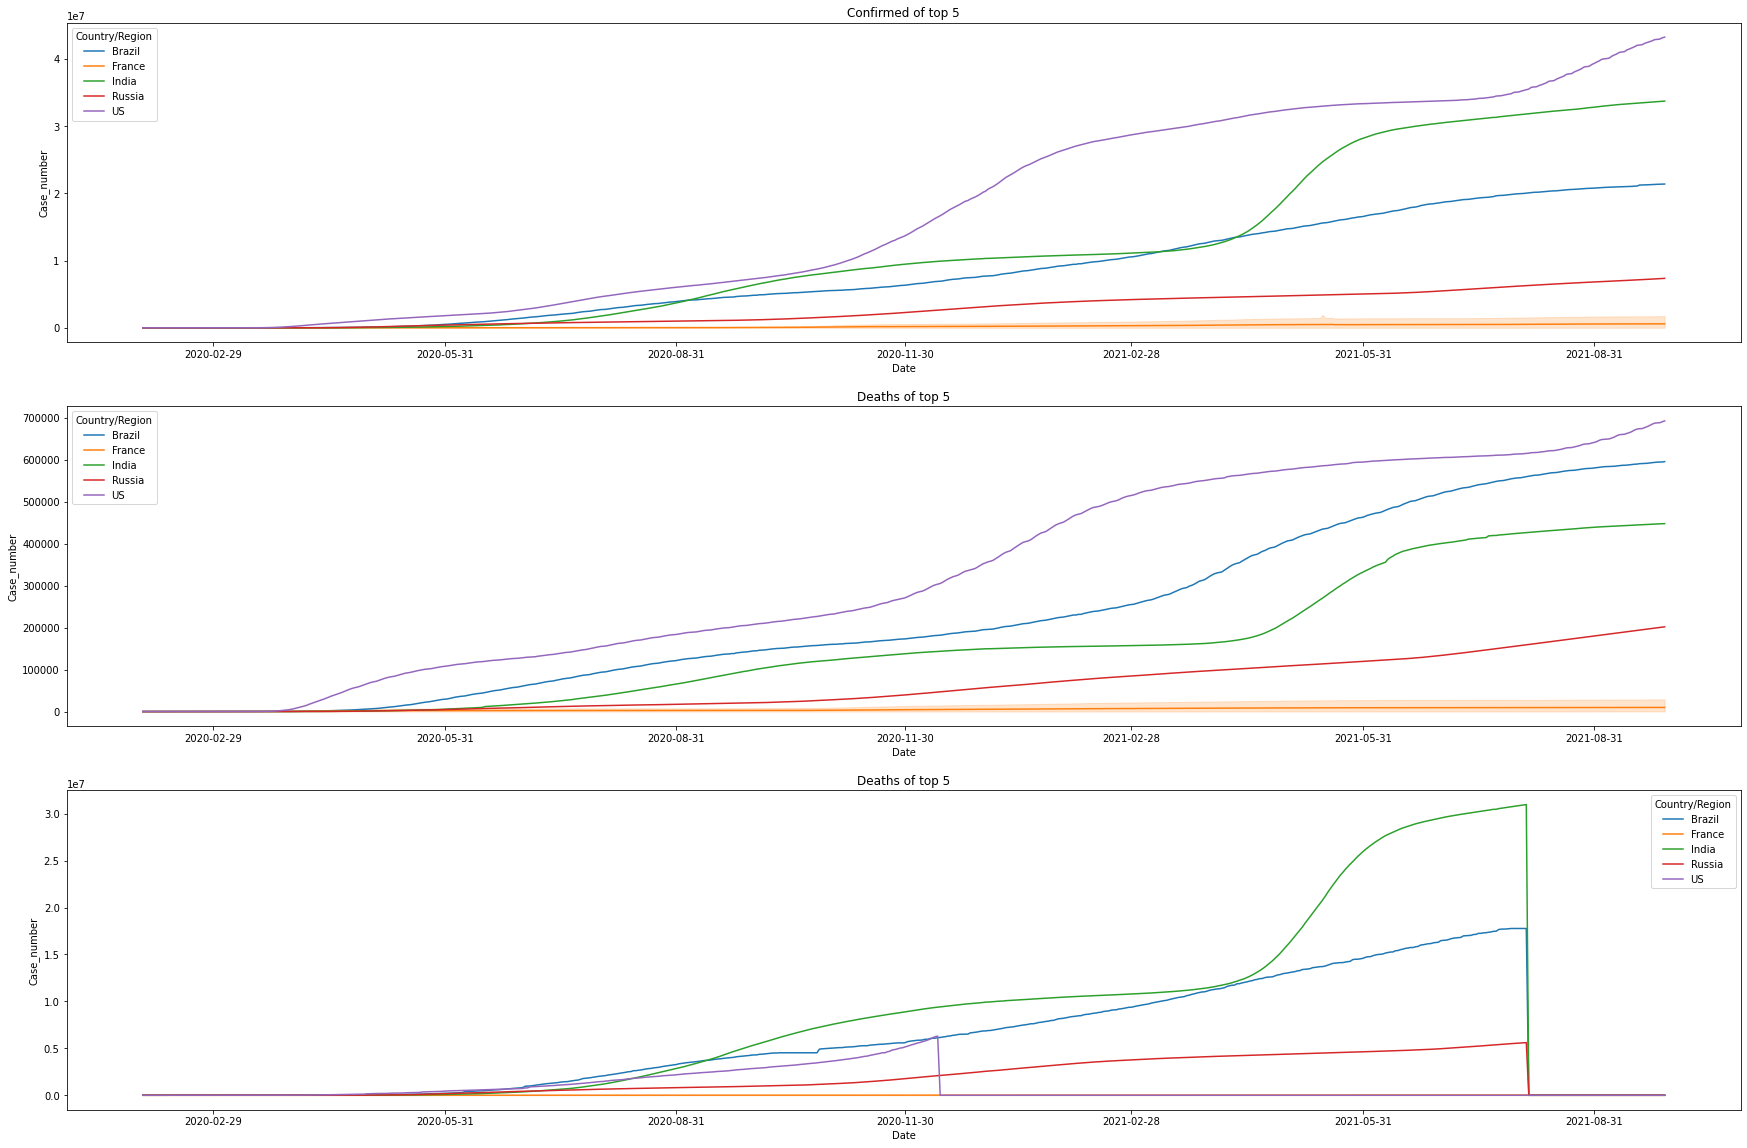

In [ ]:
fig = plt.figure(figsize = (30,20))

ax1 = plt.subplot(311)
ax1.title.set_text('Confirmed of top 5')
sns.lineplot(data = top5_data_confirmed ,
            x = top5_data_confirmed['Date'].astype(str),
            hue = 'Country/Region',
            y = 'Case_number')
plt.xticks(ticks = ['2020-02-29','2020-05-31','2020-08-31','2020-11-30','2021-02-28','2021-05-31','2021-08-31'])

ax2 = plt.subplot(312)
ax2.title.set_text('Deaths of top 5')
sns.lineplot(data = top5_data_death ,
            x = top5_data_death['Date'].astype(str),
            hue = 'Country/Region',
            y = 'Case_number')
plt.xticks(ticks = ['2020-02-29','2020-05-31','2020-08-31','2020-11-30','2021-02-28','2021-05-31','2021-08-31'])


ax3 = plt.subplot(313)
ax3.title.set_text('Deaths of top 5')
sns.lineplot(data = top5_data_recovered ,
            x = top5_data_recovered['Date'].astype(str),
            hue = 'Country/Region',
            y = 'Case_number')
plt.xticks(ticks = ['2020-02-29','2020-05-31','2020-08-31','2020-11-30','2021-02-28','2021-05-31','2021-08-31'])

####  Deeper inside about the situation of top 5 countries? Among the top 5 countries (by the current total number of confirmed cases), which country(s) we should pay special attention to? 

In [ ]:
top5_data = pd.merge(top5_data_confirmed, top5_data_death, how = 'inner', on = ['Country/Region','Date','Lat','Long'])
top5_data = pd.merge(top5_data, top5_data_recovered, how = 'inner', on = ['Country/Region','Date','Lat','Long'])
top5_data.rename(columns = {'Case_number_x': 'confirm', 'Case_number_y': 'death', 'Case_number' : 'recovered'}, inplace = True)
top5_data

,Country/Region,Lat,Long,Date,confirm,death,recovered
0,Brazil,-14.235000,-51.925300,2020-02-01,0,0,0
1,France,3.933900,-53.125800,2020-02-01,0,0,0
2,France,-17.679700,149.406800,2020-02-01,0,0,0
3,France,16.265000,-61.551000,2020-02-01,0,0,0
4,France,14.641500,-61.024200,2020-02-01,0,0,0
...,...,...,...,...,...,...,...
9691,France,-14.293800,-178.116500,2021-09-28,454,7,0
9692,France,46.227600,2.213700,2021-09-28,6834025,114394,0
9693,India,20.593684,78.962880,2021-09-28,33716451,447751,0
9694,Russia,61.524010,105.318756,2021-09-28,7355883,201854,0


In [ ]:
top5_month = top5_data.groupby([top5_data['Date'].dt.to_period('M'),'Country/Region'])[['confirm','death','recovered']].sum().reset_index()
top5_month

,Date,Country/Region,confirm,death,recovered
0,2020-02,Brazil,5,0,0
1,2020-02,France,466,19,102
2,2020-02,India,84,0,42
3,2020-02,Russia,58,0,36
4,2020-02,US,402,1,88
...,...,...,...,...,...
95,2021-09,Brazil,590462074,16473111,0
96,2021-09,France,195992116,3256988,0
97,2021-09,India,933146946,12423842,0
98,2021-09,Russia,198478333,5354820,0


In [ ]:
top5_month['mortalityRate'] = round((top5_month['death']/top5_month['confirm'])*100, 2)
top5_month['recoveryRate'] = round((top5_month['recovered']/top5_month['confirm'])*100, 2)

In [ ]:
top5_month

,Date,Country/Region,confirm,death,recovered,mortalityRate,recoveryRate
0,2020-02,Brazil,5,0,0,0.00,0.00
1,2020-02,France,466,19,102,4.08,21.89
2,2020-02,India,84,0,42,0.00,50.00
3,2020-02,Russia,58,0,36,0.00,62.07
4,2020-02,US,402,1,88,0.25,21.89
...,...,...,...,...,...,...,...
95,2021-09,Brazil,590462074,16473111,0,2.79,0.00
96,2021-09,France,195992116,3256988,0,1.66,0.00
97,2021-09,India,933146946,12423842,0,1.33,0.00
98,2021-09,Russia,198478333,5354820,0,2.70,0.00


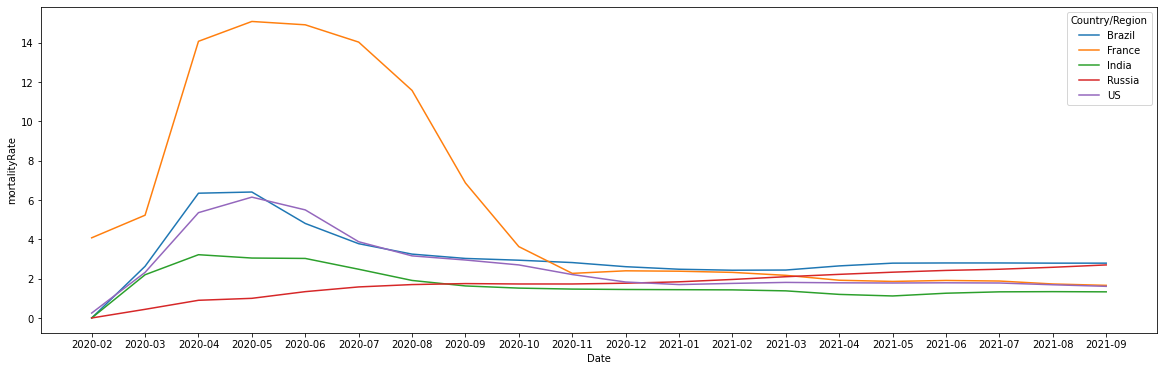

In [ ]:
# mortalityRate of top 5 country group by month 
plt.figure(figsize = (20,6))
sns.lineplot(data = top5_month,
            x = top5_month['Date'].astype(str),
            y = 'mortalityRate',
            hue = 'Country/Region')


**Conclusion from chart above:**
- All country has a peak of mortalityRate on summer 2020 **except Russia**.  On 03/2020, WHO declares covid 19 is a pandemic, at that time not many people think that it could be a pandemic.
- Although the trend of Russia is increase, there's not much different betwen peak of the mortalityRate of Russia and bottom of other country --> from 2020-02 to 2021-09, Disease control of Russia is quite good
- France has the highest peak of 2020-05, around 15 people death / 100 people confirm, double second highest number (around 6 of Brazil)
- From 10/2020, mortalityRate of 5 countries is around 3%, it might be because of higher percentage of population have been vaccinated

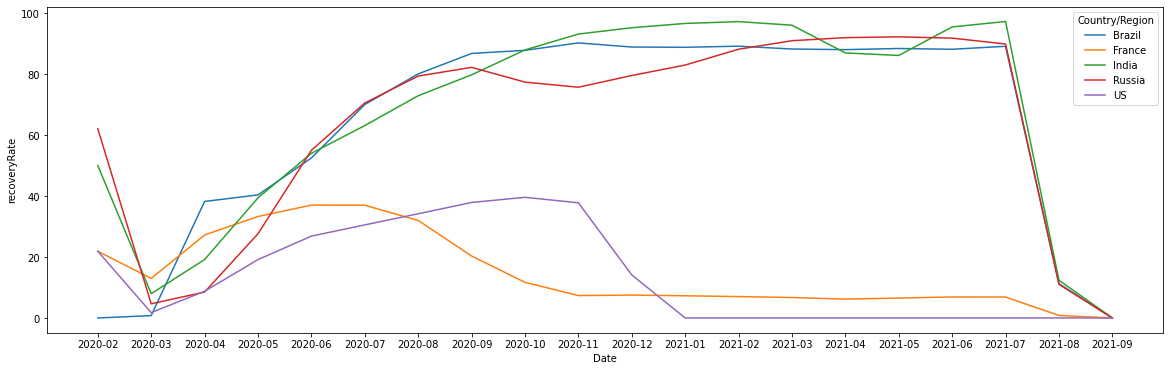

In [ ]:
# recoveryRate of top 5 country group by month 
plt.figure(figsize = (20,6))
sns.lineplot(data = top5_month,
            x = top5_month['Date'].astype(str),
            y = 'recoveryRate',
            hue = 'Country/Region')

**Conclusion:**
- From 08/2020, it seem that 3 country (Brazil, Russia, India) did have great effort to cure covid 19 patient, the recoveryRate from 80 to 100%, which mean that the active case of these 3 country almost the same or insignificant increase. The recoveryRate of 8/2021 and 9/2021 drop significantly because of the number of Recovery is not updated correctly in this dataset (As I search on internet, India have recoveryRate of 97% on 8/2021)
- All 5 countries have the worst recoveryRate on 03/2020. On 03/2020, WHO declares covid 19 is a pandemic. At that time the health sector may be not ready to deal with covid 19.
- Among 5 countries, France has the worst performace to against covid 19: mortalityRate highest on early stage (03/2020-10/2020), recoveryRate lowest almost time from 02/2020 - 7/2021 although the number of confirm case everyday of France is much lower than other country of top 5. 
